In [ ]:
#*****************************************************************
#If you have any questions please use Q&A section on www.udemy.com
#Author - jaro.algo@icloud.com
#*****************************************************************

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import matplotlib.style

plt.style.use('ggplot')

/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
df = web.DataReader('TSLA', data_source = 'yahoo', start = '2015-01-01', end = '2020-01-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,223.250000,213.259995,222.869995,219.309998,4764400,219.309998
2015-01-05,216.500000,207.160004,214.550003,210.089996,5368500,210.089996
2015-01-06,214.199997,204.210007,210.059998,211.279999,6261900,211.279999
2015-01-07,214.779999,209.779999,213.350006,210.949997,2968400,210.949997
2015-01-08,213.800003,210.009995,212.809998,210.619995,3442500,210.619995
...,...,...,...,...,...,...
2019-12-24,425.470001,412.690002,418.359985,425.250000,8054700,425.250000
2019-12-26,433.480011,426.350006,427.910004,430.940002,10633900,430.940002
2019-12-27,435.309998,426.109985,435.000000,430.380005,9945700,430.380005


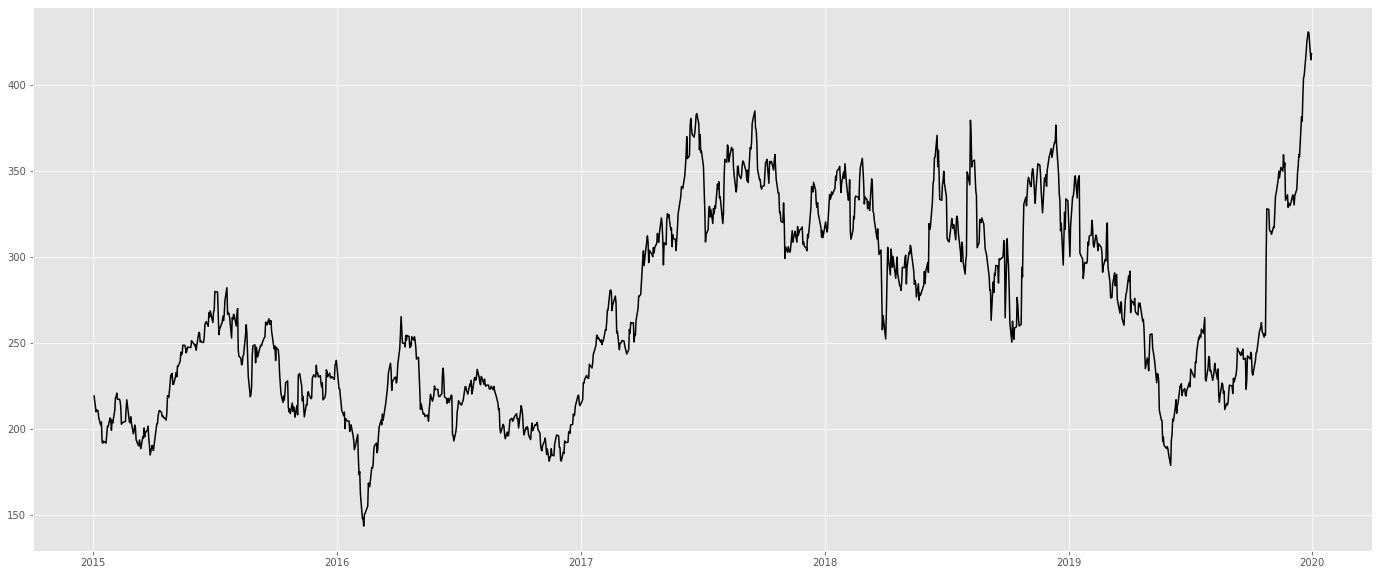

In [3]:
plt.figure(figsize = (24, 10))
plt.plot(df['Close'], color = 'black')

In [4]:
def rsi(df, n):
    df['diff'] = df['Close'].diff(1).dropna()
    df['gains'] = np.where(df['diff'] > 0, df['diff'], np.nan)
    df['losses'] = np.where(df['diff'] <= 0, df['diff'], np.nan)
    df['average_gains'] = df['gains'].rolling(n, min_periods = 1).mean()
    df['average_losses'] = df['losses'].rolling(n, min_periods = 1).mean()
    rs = abs(df['average_gains'] / df['average_losses'])
    df['RSI'] = 100 - (100 / (1 + rs))
    df = df.drop(['diff', 'gains', 'losses', 'average_gains', 'average_losses'], axis = 1)
    return df

In [5]:
df = rsi(df, 14)
df

,High,Low,Open,Close,Volume,Adj Close,RSI
Date,,,,,,,
2015-01-02,223.250000,213.259995,222.869995,219.309998,4764400,219.309998,NaN
2015-01-05,216.500000,207.160004,214.550003,210.089996,5368500,210.089996,NaN
2015-01-06,214.199997,204.210007,210.059998,211.279999,6261900,211.279999,11.431335
2015-01-07,214.779999,209.779999,213.350006,210.949997,2968400,210.949997,19.949734
2015-01-08,213.800003,210.009995,212.809998,210.619995,3442500,210.619995,26.542781
...,...,...,...,...,...,...,...
2019-12-24,425.470001,412.690002,418.359985,425.250000,8054700,425.250000,80.642896
2019-12-26,433.480011,426.350006,427.910004,430.940002,10633900,430.940002,82.071290
2019-12-27,435.309998,426.109985,435.000000,430.380005,9945700,430.380005,86.078816


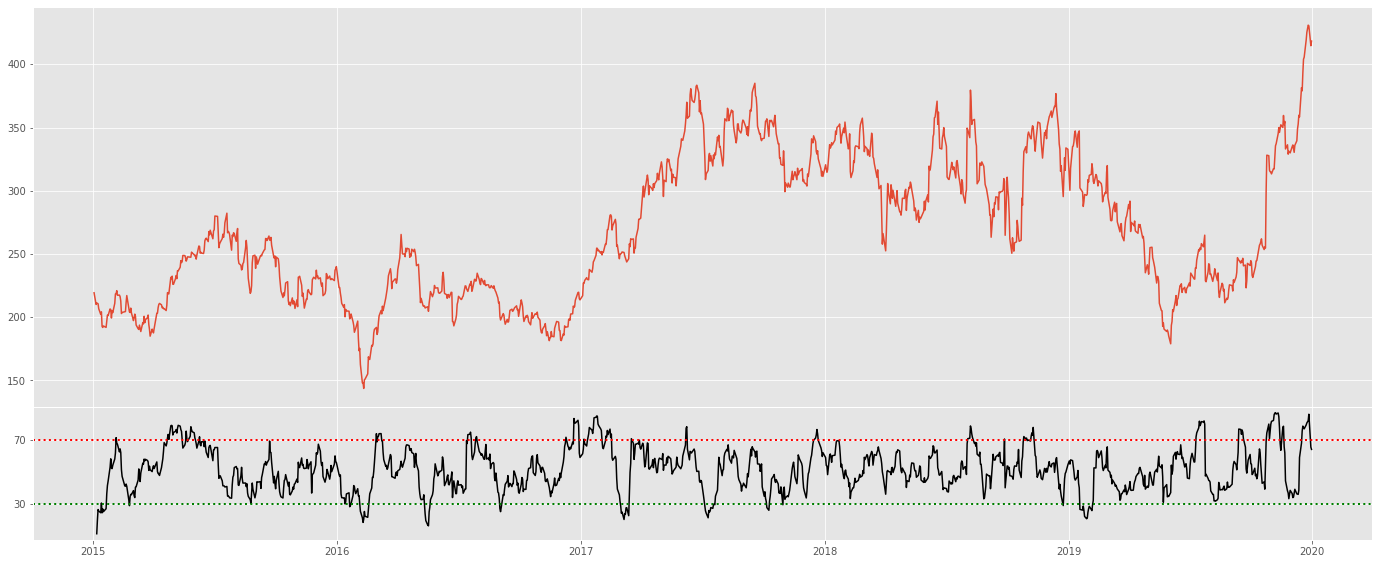

In [12]:
fig = plt.figure(figsize = (24, 14))
ax1 = plt.subplot2grid((7, 1), (1, 0), rowspan = 3, colspan = 4)
ax1.plot(df['Close'])
plt.subplots_adjust(top = 1.05, hspace = 0)

ax2 = plt.subplot2grid((7, 1), (4, 0), sharex = ax1, rowspan = 1, colspan = 4)
ax2.plot(df['RSI'], color = 'black')

ax2.axhline(70, color = 'red', linestyle = 'dotted', linewidth = 2)
ax2.axhline(30, color = 'green', linestyle = 'dotted', linewidth = 2)
ax2.set_yticks([30, 70])